## sentiment analysis - TFIDF feature weighting with RNN classification

`Term Weighting = TFIDF`

# Libraries

In [2]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #Count Vector Space Model
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import metrics #Matrix Builder
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import KFold #Import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.sparse import csr_matrix

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout

from keras import Sequential
from keras.models import load_model

from sklearn.model_selection import KFold

import tensorflow as tf

# Load Dataset

_`preprocessed dataset`_

In [24]:
df = pd.read_csv('D:\kuliah\THE ONLY TA THINGS\DATA\cleaned_75_data_sample.csv')
df

,stemming,label
0,['donload'],-1
1,"['jelek', 'aplikasi']",-1
2,"['malaysia', 'saldo', 'isi', 'coin', 'uang', '...",-1
3,['senang'],-1
4,['lumayan'],1
5,['ndak'],1
6,"['maaf', 'kasih', 'bintang', 'bagus', 'tidak',...",1
7,"['masalhnya', 'pnya', 'cod']",1
8,"['coba', 'daftarin', 'akun', 'penuh', 'syarat'...",-1
9,"['bagus', 'susah', 'ganti', 'profil', 'pencet']",1


In [25]:
df = df.dropna()
df = df.reset_index(drop=True)
# df = df[df.stemming != '[]']

In [26]:
df.isnull().sum()

stemming    0
label       0
dtype: int64

_`total label value`_

In [27]:
df['label'].value_counts()

-1    20
 1    20
 0     8
Name: label, dtype: int64

# TFIDF for feature weighting

#### split data test data train

In [28]:
X = df["stemming"]
y = df["label"] #data target

In [29]:
y.dtype

dtype('int64')

In [30]:
tfidf_vect = TfidfVectorizer(use_idf = True ,max_features = 5000)
x = tfidf_vect.fit(df['stemming'])
TFIDF = x.transform(df['stemming'])
TFIDF = TFIDF.toarray()

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(TFIDF, y, test_size=0.2, random_state=42)


In [32]:
print(TFIDF)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.54011193 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.27933194 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


_`Seperate label to its own array`_

In [33]:
label = []
for data in df['label']:
    label.append(data)
kolom = label.pop

label

[-1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 0,
 -1,
 0,
 1,
 1,
 -1,
 -1,
 1,
 1,
 0,
 1,
 0,
 -1,
 0,
 0,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1]

In [34]:
def Average(lst):
    return sum(lst) / len(lst)

## Define RNN Model

In [35]:
# Define the RNN model
def build_model(input_dim):
    model = Sequential()
    model.add(LSTM(units=128, input_shape=(input_dim, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

## implement w/ k-fold

In [1]:
# Train and evaluate the RNN model using k-fold cross-validation
folds = range(2,10)

for k in folds:
    scores = []
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train = np.array(y_train)
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        model = build_model(input_dim=X_train.shape[1])
        model.fit(np.expand_dims(X_train_fold, axis=2), y_train_fold, batch_size=64, epochs=5, verbose=0)
        loss, accuracy = model.evaluate(np.expand_dims(X_val_fold, axis=2), y_val_fold, verbose=0)
        scores.append(accuracy)
    print('Folds : %d | Accuracy : %.3f | Max, Min : %.3f, %.3f' 
            % (k, Average(scores), max(scores), min(scores)))
    print("\n")

print('Cross-validation accuracy:', np.mean(scores))

NameError: name 'KFold' is not defined

In [37]:
# Evaluate the RNN model on the test set
loss, accuracy = model.evaluate(np.expand_dims(X_test, axis=2), y_test)
print('Test accuracy:', accuracy)

1/1 [==============================] - 1s 1s/step - loss: 0.6567 - accuracy: 0.4000
Test accuracy: 0.4000000059604645


In [40]:
# batch_size = 64
# num_epochs = 5
# model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1)

model.fit(np.expand_dims(X_train, axis=2), y_train, batch_size=32, epochs=5)

Epoch 1/5
2/2 [==============================] - 0s 85ms/step - loss: 0.3407 - accuracy: 0.1053
Epoch 2/5
2/2 [==============================] - 0s 79ms/step - loss: 0.2501 - accuracy: 0.1053
Epoch 3/5
2/2 [==============================] - 0s 165ms/step - loss: 0.1211 - accuracy: 0.1053
Epoch 4/5
2/2 [==============================] - 0s 82ms/step - loss: -0.0518 - accuracy: 0.1053
Epoch 5/5
2/2 [==============================] - 0s 74ms/step - loss: -0.2733 - accuracy: 0.1053


In [41]:
# Evaluate the model on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the classification report
class_names = ['negative', 'neutral', 'positive']
report = classification_report(y_test, y_pred, target_names=class_names)
print('Confusion matrix:')
print(conf_matrix)
print('Classification report:')
print(report)

1/1 [==============================] - 0s 53ms/step
Confusion matrix:
[[0 2 0]
 [0 4 0]
 [0 4 0]]
Classification report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
     neutral       0.40      1.00      0.57         4
    positive       0.00      0.00      0.00         4

    accuracy                           0.40        10
   macro avg       0.13      0.33      0.19        10
weighted avg       0.16      0.40      0.23        10



c:\Users\Madluke\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Madluke\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Madluke\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

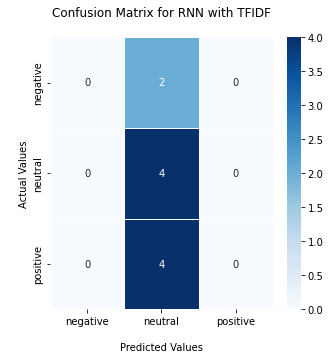

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize = (5, 5))
ax = sns.heatmap(conf_matrix, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['negative', 'neutral', 'positive'],
                    yticklabels = ['negative', 'neutral', 'positive'])
ax.set_title("Confusion Matrix for RNN with TFIDF\n")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("\nActual Values")
plt.show()

In [51]:
# #K-Fold Cross Validation will iterate k times
# kFoldCrossValidation = KFold(n_splits=7, random_state=0, shuffle = True)

# actual_classes = np.empty([0], dtype=int)
# predicted_classes = np.empty([0], dtype=int)
    
# for train, test in kFoldCrossValidation.split(TFIDF, label):
#     #Initiate Train and Test Data then transform to TFIDF value. Then copy to new Train and Test variables. 
#     trainData, testData = TFIDF[train], TFIDF[test]
#     label = np.array(label)
#     trainData2, testData2 = label[train], label[test]
    
#     model = build_model(input_dim=X_train.shape[1])
#     model.fit(np.expand_dims(X_train_fold, axis=2), y_train_fold, batch_size=64, epochs=5, verbose=0)
#     loss, accuracy = model.evaluate(np.expand_dims(X_val_fold, axis=2), y_val_fold, verbose=0)
    
#     actual_classes = np.append(actual_classes, label[test])
#     predicted_classes = np.append(predicted_classes, model.predict(testData))
   
#     scores.append(accuracy)

# conf_matrix = metrics.confusion_matrix(actual_classes, predicted_classes)
# rnn_accuracy = metrics.accuracy_score(actual_classes, predicted_classes)
# precision = metrics.precision_score(actual_classes, predicted_classes, average='binary')
# recall = metrics.recall_score(actual_classes, predicted_classes, average='binary')
# f1score = metrics.f1_score(actual_classes, predicted_classes, average='binary')

# print("\nConfusion Matrix: \n", conf_matrix)
# print("------------------------------------------------------------")
# print(classification_report(actual_classes, predicted_classes, digits = 4,
#                            target_names = ['negative', 'neutral', 'positive']))
# print("------------------------------------------------------------")
# print("\nAccuracy : %.3f, Precission : %.3f, Recall : %.3f, F1 Score : %.3f" %(rnn_accuracy, precision, recall, f1score))